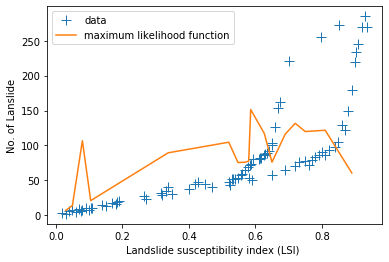

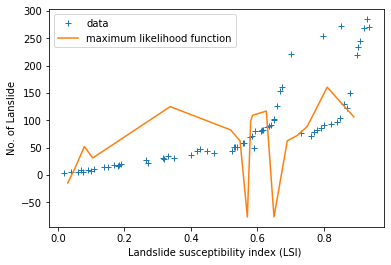

coefficient of determination: 0.9954461166012779
predicted response:
[  2.5          2.5          5.50000001   8.00000001   5.50000001
   8.00000001   7.           7.           9.           9.
  11.00000002  11.00000002  14.49999997  14.49999997  17.
  17.          19.5         19.5         25.          25.
  30.50000001  30.50000001  32.99999999  38.5         32.99999999
  38.5         44.99999999  43.50000001  44.99999999  43.50000001
  50.          48.00000001  50.          48.00000001  53.
  53.          56.          54.50000001  61.5         67.
  56.          71.          75.5         54.50000001  78.99999998
  76.50000002  80.50000001  82.5         86.5         89.50000002
  87.49999997  93.00000003  99.5         61.5        104.
 127.99999997 138.         156.          67.         200.49999999
  71.          75.5         78.99999998  76.50000002  80.50000001
  82.5         86.5        250.          89.50000002  87.49999997
  93.00000003  99.5        104.         270.5        12

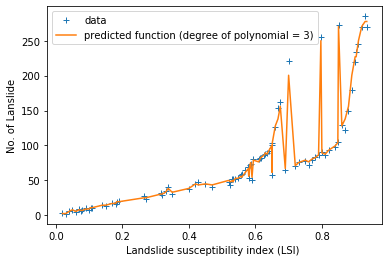

0.9954461166012779


In [0]:
import pandas as pd
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Reading the dataset 
df2 = pd.read_csv("ML_Regression_Data.csv", header='infer')

# Exracting input data and output data
x_axis = df2.iloc[:,1]
X = df2.iloc[:,2:]
Y = df2.iloc[:,0]

# Spliting the data into training and testing part
train_X, test_X, train_y, test_y, x_axis_train, x_axis_test = train_test_split(X, Y, x_axis, train_size=0.8, test_size=0.2)

# Merging the two matrix
data = np.column_stack((x_axis_test, test_X))
# Sorting the matrix by first column
data1 = data[data[:,0].argsort()]

# Extracting testing data from sorted matrix
x_axis_test = data1[:,0]
test_X = data1[:,1:]    
    
### MLE using Normal equation, without Intercept
    
# For MLE (Maximum likelyhood estimation)
def max_lik_estimate(X, y):
  N, D = X.shape
  theta_ml = np.zeros((D, 1))       # Initiating the theta vector
  a = np.linalg.pinv(np.dot(X.T, X))  # pseudo inverse of (X^T)X
  b = np.dot(X.T, y)                # Dot product of (X^T)y
  theta_ml = np.matmul(a, b)        # Multiplication of (X^T)X and (X^T)y
  return theta_ml
    
def predict_with_estimate(Xtest, theta):
  # predit the output. i.e, (X^T)theta
  prediction = np.dot(Xtest, theta)         
  return prediction

# Estimating theta 
theta = max_lik_estimate(train_X, train_y)
    
# Prediction of testing data
ml_prediction = predict_with_estimate(test_X, theta)

# ploting the results
plt.plot(x_axis, Y ,'+', markersize=10)
plt.plot(x_axis_test, ml_prediction)
plt.legend(["data", "maximum likelihood function"]);
plt.xlabel("Landslide susceptibility index (LSI) ")
plt.ylabel("No. of Lanslide")
plt.show()



### MLE using Normal equation, with intercept

def lr_mle(X, y):
  N, D = X.shape
  # augmented training inputs of size N x (D+1)
  aug_X = np.hstack([np.ones((N,1)), X])
  
  # new theta vector of size (D+1) x 1
  aug_theta = np.zeros((D+1, 1)) 

  augX_t = aug_X.transpose()    # Taking transpose of augmented X
  a = np.dot(augX_t,aug_X)      # Dot product
  b = np.linalg.pinv(a)         # pseudo inverse
  c = np.dot(b,augX_t)          # Dot product
  aug_theta_ml = np.dot(c,y)    # Calculating augmented theta
  return aug_theta_ml
    
def pred_mle(X, theta):
  y = np.dot(X, theta)          # Predicting output
  return y
    
    
N, D = test_X.shape
aug_X = np.hstack([np.ones((N,1)), test_X])

# Calculating theta
theta = lr_mle(train_X, train_y)

# Predicting theta
ml_pred = pred_mle(aug_X, theta)

# Ploting result
plt.figure()
plt.plot(x_axis_train, train_y, '+')
plt.plot(x_axis_test, ml_pred)
plt.xlabel("Landslide susceptibility index (LSI) ")
plt.ylabel("No. of Lanslide")
plt.legend(["data", "maximum likelihood function"]);
plt.show()
    
    
    
#### Polynomial regression
    
x = X
y = Y

# Converting X into nonlinear function
x_ = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x)

# Applying regression on nonlinear function of X        
model = LinearRegression(fit_intercept=False).fit(x_, y)
    
# Getting RMSE 
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)

# Predicting output from the trained model
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

# Plotting result
plt.plot(x_axis, y, '+')
plt.plot(x_axis, y_pred)
plt.xlabel("Landslide susceptibility index (LSI) ")
plt.ylabel("No. of Lanslide")
plt.legend(["data", "predicted function (degree of polynomial = 3)"]);
plt.show()


r2 = r2_score(y,y_pred)
print(r2)